In [4]:
"""import numpy as np
import pandas as pd
import nltk

In [5]:
"""df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
"""df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
"""print(len(df_sms))
df_sms.label.value_counts()
df_sms.describe()

df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

5572


,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

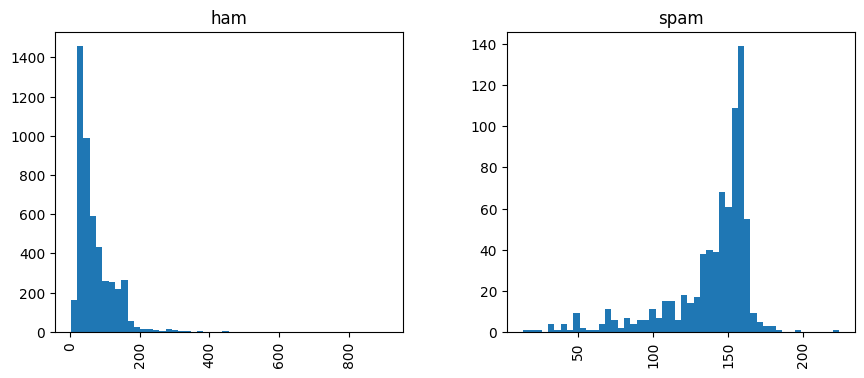

In [8]:
"""df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [9]:
"""df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
"""# BOW Approach
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [11]:
"""sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))

sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [12]:
"""preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [66]:
"""frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [67]:
"""from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [15]:
#count_vector.fit(documents)
#count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [16]:
#doc_array = count_vector.transform(documents).toarray()
#doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [18]:
#frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
#frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [68]:
"""from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert y_train_encoded to the integer data type
y_train_encoded = y_train_encoded.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'],
                                                    df_sms['label'],
                                                    test_size=0.20,
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

#upward blk
count_vector.fit(documents)
count_vector.get_feature_names_out()
doc_array = count_vector.transform(documents).toarray()
doc_array
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix
#end

# Fit and transform the training data
training_data = count_vector.fit_transform(X_train)

# Transform the testing data
testing_data = count_vector.transform(X_test)

# Calculate class weights
class_weights = {0: 1, 1: 10}  # Adjust the weights as needed

# Instantiate and train the Multinomial Naive Bayes classifier with class weights
naive_bayes = MultinomialNB(class_prior=None, fit_prior=True)
naive_bayes.fit(training_data, y_train_encoded, sample_weight=np.array([class_weights[label] for label in y_train_encoded]))


MultinomialNB()

In [69]:
"""# Generate predictions on the testing data
predictions = naive_bayes.predict(testing_data)

# Check for NaN values in predictions
print('NaN values in predictions:', pd.isnull(predictions).sum())


NaN values in predictions: 0


In [116]:
                                                                # SMS spam Detection using python #

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
# Load the dataset
df_sms = pd.read_csv('spam.csv', encoding='latin-1')
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})


In [103]:
# Data preprocessing
# Convert labels to numerical values
label_encoder = LabelEncoder()
df_sms['label'] = label_encoder.fit_transform(df_sms['label'])

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], df_sms['label'], test_size=0.20, random_state=1)


In [105]:
# Vectorize the text data
count_vector = CountVectorizer()
X_train_vectorized = count_vector.fit_transform(X_train)
X_test_vectorized = count_vector.transform(X_test)

In [106]:
# Train the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [107]:
# Generate predictions on the testing data
predictions = naive_bayes.predict(X_test_vectorized)

In [108]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [109]:
# Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9847533632286996
Precision: 0.9420289855072463
Recall: 0.935251798561151
F1 Score: 0.9386281588447654


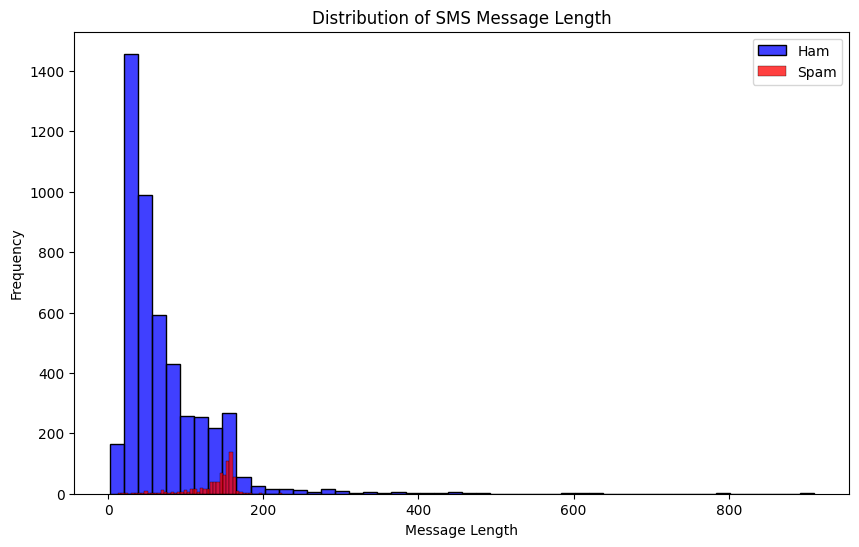

In [115]:
# Visualize SMS message length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sms[df_sms['label'] == 0]['sms'].apply(len), color='blue', label='Ham', bins=50)
sns.histplot(df_sms[df_sms['label'] == 1]['sms'].apply(len), color='red', label='Spam', bins=50)
plt.title('Distribution of SMS Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

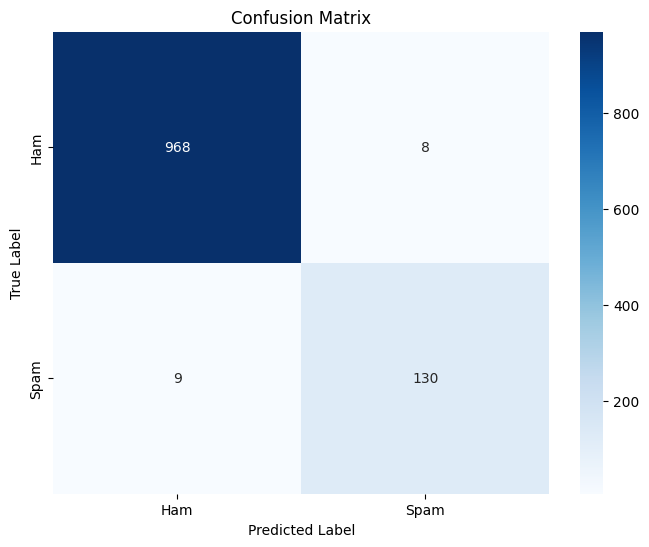

In [117]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()